In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(-90.000, 90.000, size=1500)
lngs = np.random.uniform(-180.000, 180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | athabasca
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | salalah
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | avarua
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | chiriqui grande
Processing Record 12 of Set 1 | tilichiki
Processing Record 13 of Set 1 | torbay
Processing Record 14 of Set 1 | bambous virieux
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | ostrovnoy
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | noumea
Processing Record 21 of Set 1 | balassagyarmat
Processing Record 22 of Set 1 | port-gen

Processing Record 41 of Set 4 | karasburg
Processing Record 42 of Set 4 | manoharpur
Processing Record 43 of Set 4 | kudahuvadhoo
Processing Record 44 of Set 4 | odweyne
Processing Record 45 of Set 4 | sataua
City not found. Skipping...
Processing Record 46 of Set 4 | kuching
Processing Record 47 of Set 4 | tessalit
Processing Record 48 of Set 4 | borlange
City not found. Skipping...
Processing Record 49 of Set 4 | san jeronimo
Processing Record 50 of Set 4 | kartaly
Processing Record 1 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 2 of Set 5 | sortland
Processing Record 3 of Set 5 | saint george
Processing Record 4 of Set 5 | fare
Processing Record 5 of Set 5 | grindavik
Processing Record 6 of Set 5 | katsuura
Processing Record 7 of Set 5 | sai buri
Processing Record 8 of Set 5 | wladyslawowo
Processing Record 9 of Set 5 | deputatskiy
Processing Record 10 of Set 5 | two rivers
Processing Record 11 of Set 5 | camacha
Processing Record 12 of Set 5 | tro

Processing Record 30 of Set 8 | menomonie
Processing Record 31 of Set 8 | antsirabe
Processing Record 32 of Set 8 | ha tinh
Processing Record 33 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 34 of Set 8 | paka
Processing Record 35 of Set 8 | masaka
Processing Record 36 of Set 8 | pacific grove
Processing Record 37 of Set 8 | verkh-usugli
Processing Record 38 of Set 8 | sopotnica
Processing Record 39 of Set 8 | rawson
Processing Record 40 of Set 8 | turtkul
City not found. Skipping...
Processing Record 41 of Set 8 | podyuga
Processing Record 42 of Set 8 | laiagam
City not found. Skipping...
Processing Record 43 of Set 8 | jaguarao
Processing Record 44 of Set 8 | bandrele
Processing Record 45 of Set 8 | ust-maya
Processing Record 46 of Set 8 | bosaso
Processing Record 47 of Set 8 | mocuba
Processing Record 48 of Set 8 | taburi
City not found. Skipping...
Processing Record 49 of Set 8 | lashio
Processing Record 50 of Set 8 | uige
Processing Record 1 of Set 9 | timbiqu

City not found. Skipping...
Processing Record 15 of Set 12 | kharp
Processing Record 16 of Set 12 | hastings
Processing Record 17 of Set 12 | nara
Processing Record 18 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 19 of Set 12 | borgo san lorenzo
Processing Record 20 of Set 12 | zalantun
Processing Record 21 of Set 12 | wani
Processing Record 22 of Set 12 | tankhoy
Processing Record 23 of Set 12 | penzance
Processing Record 24 of Set 12 | beyneu
Processing Record 25 of Set 12 | srednekolymsk
Processing Record 26 of Set 12 | nagato
Processing Record 27 of Set 12 | anadyr
Processing Record 28 of Set 12 | strezhevoy
Processing Record 29 of Set 12 | bandar-e torkaman
City not found. Skipping...
Processing Record 30 of Set 12 | saleaula
City not found. Skipping...
Processing Record 31 of Set 12 | arkansas city
Processing Record 32 of Set 12 | oda
Processing Record 33 of Set 12 | puerto del rosario
Processing Record 34 of Set 12 | yulara
Processing Record 35 of Set

In [7]:
len(city_data)

564

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Athabasca,54.72,-113.29,18.21,87,58,6.89,CA,2020-10-22 04:25:32
1,Upernavik,72.79,-56.15,23.11,95,70,2.75,GL,2020-10-22 04:25:32
2,Mataura,-46.19,168.86,60.01,57,94,8.01,NZ,2020-10-22 04:25:32
3,Chapais,49.78,-74.85,32.00,98,90,5.82,CA,2020-10-22 04:25:32
4,Punta Arenas,-53.15,-70.92,48.20,66,75,16.11,CL,2020-10-22 04:25:32
5,Salalah,17.02,54.09,77.00,69,40,4.70,OM,2020-10-22 04:12:50
6,Hilo,19.73,-155.09,78.80,69,1,5.28,US,2020-10-22 04:25:32
7,Avarua,-21.21,-159.78,75.20,83,100,8.05,CK,2020-10-22 04:25:32
8,Albany,42.60,-73.97,63.00,77,98,1.99,US,2020-10-22 04:25:33
9,Chiriqui Grande,8.95,-82.12,63.00,100,92,2.71,PA,2020-10-22 04:25:33


In [9]:
arranged_city_data = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[arranged_city_data]

In [10]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Athabasca,CA,2020-10-22 04:25:32,54.72,-113.29,18.21,87,58,6.89
1,Upernavik,GL,2020-10-22 04:25:32,72.79,-56.15,23.11,95,70,2.75
2,Mataura,NZ,2020-10-22 04:25:32,-46.19,168.86,60.01,57,94,8.01
3,Chapais,CA,2020-10-22 04:25:32,49.78,-74.85,32.00,98,90,5.82
4,Punta Arenas,CL,2020-10-22 04:25:32,-53.15,-70.92,48.20,66,75,16.11
5,Salalah,OM,2020-10-22 04:12:50,17.02,54.09,77.00,69,40,4.70
6,Hilo,US,2020-10-22 04:25:32,19.73,-155.09,78.80,69,1,5.28
7,Avarua,CK,2020-10-22 04:25:32,-21.21,-159.78,75.20,83,100,8.05
8,Albany,US,2020-10-22 04:25:33,42.60,-73.97,63.00,77,98,1.99
9,Chiriqui Grande,PA,2020-10-22 04:25:33,8.95,-82.12,63.00,100,92,2.71


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [14]:
import time

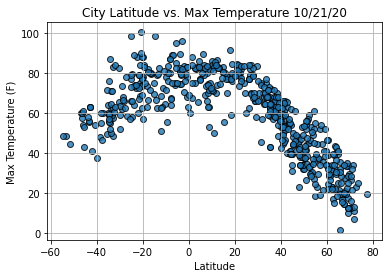

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

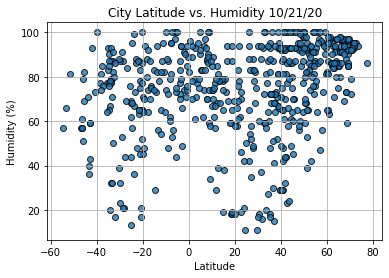

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

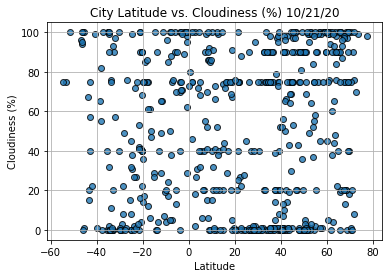

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

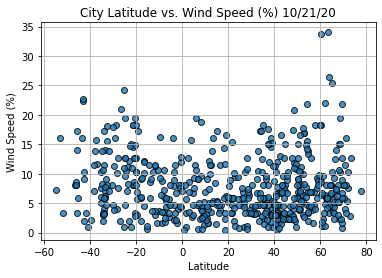

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed (%) " + time.strftime("%x"))
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()